In dieser Abgabe wird versucht, anhand der gegebenen Daten den Hauspreis weiterer Häuser zu bestimmen.
Bei dem Maschinen Learning wird in 3 Hauptgruppen unterschieden. Supervised learning(überwachtes Lernen), unsupervised learning(unüberwachtest Lernen) und reinforcement learning(bestärkendes lernen). 
Es wird sich für eine Regression(Teil des supervised learning) entschieden, da das Clustering(unsupervised learning) in "Gruppen" gliedert die ich jedoch nicht benötige, die Klassifikation(supervised learning) vorgegebene Kategorien braucht, die ich hier auch nicht benötige sonder wir durch eingabe verschiedener variablen den Wert einer vorherage treffen möchten.

Zusammenfassend kann gesagt werden, dass Clustering dabei hilft, die inhärente Struktur innerhalb eines Datensatzes zu entdecken, Klassifikation für das Zuordnen von Datenpunkten zu vordefinierten Kategorien verwendet wird, und Regression für die Vorhersage eines kontinuierlichen Wertes eingesetzt wird.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns
import scipy.stats as sp
from sklearn.model_selection import train_test_split

data = pd.read_csv("Daten/data.csv")

In [60]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Hier wird der Datensatz erstmal auf Null-Werte überprüft, die später die Berechnungen verfälschen könnten. Wie jedoch zu sehen ist, enthält jede spalte genau 4600 Einträge was auf keine leeren Zeilen hinweist.

## Charakterisierung der Daten

In [62]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [63]:
(data.price == 0).sum()

49

In [64]:
data['price'].replace(0, np.nan, inplace = True)

data.isnull().sum()

/var/folders/d_/ps907j3n4wg1hrgs7kkkvx580000gn/T/ipykernel_19082/2997053107.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['price'].replace(0, np.nan, inplace = True)


date              0
price            49
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
street            0
city              0
statezip          0
country           0
dtype: int64

In [65]:
data.dropna(inplace=True)
(data.price == 0).sum()

0

In [73]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4551.0,557905.899138,563929.871279,7800.0,326264.285715,465000.00,657500.0,26590000.0
bedrooms,4551.0,3.394639,0.904595,0.0,3.000000,3.00,4.0,9.0
bathrooms,4551.0,2.155021,0.776351,0.0,1.750000,2.25,2.5,8.0
sqft_living,4551.0,2132.372226,955.949708,370.0,1460.000000,1970.00,2610.0,13540.0
sqft_lot,4551.0,14835.280598,35964.077825,638.0,5000.000000,7680.00,10978.0,1074218.0
floors,4551.0,1.512195,0.538531,1.0,1.000000,1.50,2.0,3.5
waterfront,4551.0,0.006592,0.080932,0.0,0.000000,0.00,0.0,1.0
view,4551.0,0.234674,0.765373,0.0,0.000000,0.00,0.0,4.0
condition,4551.0,3.449352,0.675160,1.0,3.000000,3.00,4.0,5.0
sqft_above,4551.0,1822.221710,854.452888,370.0,1190.000000,1590.00,2300.0,9410.0


In [74]:
data.nunique(axis = 0)  

date               70
price            1740
bedrooms           10
bathrooms          26
sqft_living       561
sqft_lot         3087
floors              6
waterfront          2
view                5
condition           5
sqft_above        510
sqft_basement     207
yr_built          115
yr_renovated       59
street           4476
city               44
statezip           77
country             1
dtype: int64

In [76]:
# eventuelle ergänzung für das Regressionsmodell falls das Ergebnis nicht gut genug ist
#   --> Problem: Dimensionalität (zu viele Merkmale später)
house = pd.get_dummies(data, columns=['city'], prefix=['city'], dtype=int)
house = house.drop(['date', 'street', 'statezip', 'country','sqft_above'], axis = 1)
house

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,0,...,0,0,1,0,0,0,0,0,0,0
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,280,...,0,1,0,0,0,0,0,0,0,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,800,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,0,...,0,1,0,0,0,0,0,0,0,0
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1020,...,0,1,0,0,0,0,0,0,0,0


# Datensatz in Trainings- und Testdaten teilen

In [66]:
X = data.drop(["price"], axis=1)
y = data["price"]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [79]:
val_data = X_val.join(y_val)
val_data

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price
3187,2014-06-24 00:00:00,3.0,2.25,1860,15559,2.0,0,0,4,1860,0,1963,0,52435 SE 496th Pl,Enumclaw,WA 98022,USA,380000.000000
973,2014-05-20 00:00:00,3.0,1.50,1490,9630,1.0,0,0,4,1490,0,1959,0,6428 NE 184th St,Kenmore,WA 98028,USA,385000.000000
1846,2014-06-04 00:00:00,2.0,1.00,960,4920,1.0,0,0,3,960,0,1942,1999,9007 4th Ave NW,Seattle,WA 98117,USA,280000.000000
3825,2014-07-02 00:00:00,3.0,2.25,1920,7738,1.0,0,0,3,1520,400,1965,1993,249 S 163rd Pl,Burien,WA 98148,USA,250000.000000
637,2014-05-14 00:00:00,4.0,2.75,2450,15002,1.0,0,0,5,2450,0,1974,0,404 SW 197th St,Normandy Park,WA 98166,USA,530000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,2014-05-02 00:00:00,4.0,1.75,1600,6380,1.0,0,0,3,1130,470,1959,1989,2021 NE 100th St,Seattle,WA 98125,USA,495000.000000
4577,2014-07-03 00:00:00,2.0,1.00,870,4600,1.0,0,0,4,870,0,1942,1982,8506 37th Ave SW,Seattle,WA 98126,USA,287919.782609
2153,2014-06-09 00:00:00,3.0,1.75,1760,10780,1.0,0,0,3,1760,0,1977,2004,1829 140th Ave SE,Bellevue,WA 98005,USA,554000.000000
1130,2014-05-21 00:00:00,5.0,3.75,5330,6000,2.0,0,2,3,3570,1760,2006,0,832 Summerhill Ridge Dr NW,Issaquah,WA 98027,USA,950000.000000


In [80]:
train_data = X_train.join(y_train)

train_data

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price
4568,2014-07-02 00:00:00,2.0,1.00,1050,6600,1.5,0,0,3,1050,0,1964,2000,13407 8th Ave S,Burien,WA 98168,USA,168333.333333
3227,2014-06-24 00:00:00,3.0,2.50,1930,4500,2.0,0,0,3,1930,0,1990,2009,25238 SE 35th St,Issaquah,WA 98029,USA,425000.000000
3006,2014-06-20 00:00:00,5.0,2.25,2290,7420,1.0,0,0,3,1290,1000,1973,2013,13038 SE 184th Pl,Renton,WA 98058,USA,359900.000000
1423,2014-05-28 00:00:00,2.0,1.00,1320,8865,1.0,0,0,4,1320,0,1943,0,2496-2598 S 121st St,Burien,WA 98168,USA,215000.000000
2097,2014-06-09 00:00:00,3.0,3.00,2470,36445,2.0,0,0,4,2470,0,1980,0,25616 SE 152nd St,Issaquah,WA 98027,USA,525000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,2014-07-09 00:00:00,4.0,2.75,2700,6000,2.0,0,0,4,2100,600,1910,0,1925 Walnut Ave SW,Seattle,WA 98116,USA,749000.000000
3132,2014-06-23 00:00:00,4.0,2.50,2540,8400,2.0,0,0,5,2540,0,1977,0,25209 45th Ave S,Kent,WA 98032,USA,269950.000000
1698,2014-06-02 00:00:00,2.0,1.00,1170,6000,1.0,0,0,4,970,200,1941,1998,9552 Phinney Ave N,Seattle,WA 98103,USA,455000.000000
427,2014-05-09 00:00:00,4.0,2.25,1930,7452,1.0,0,0,3,1430,500,1984,0,21423 114th Pl SE,Kent,WA 98031,USA,312000.000000


array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

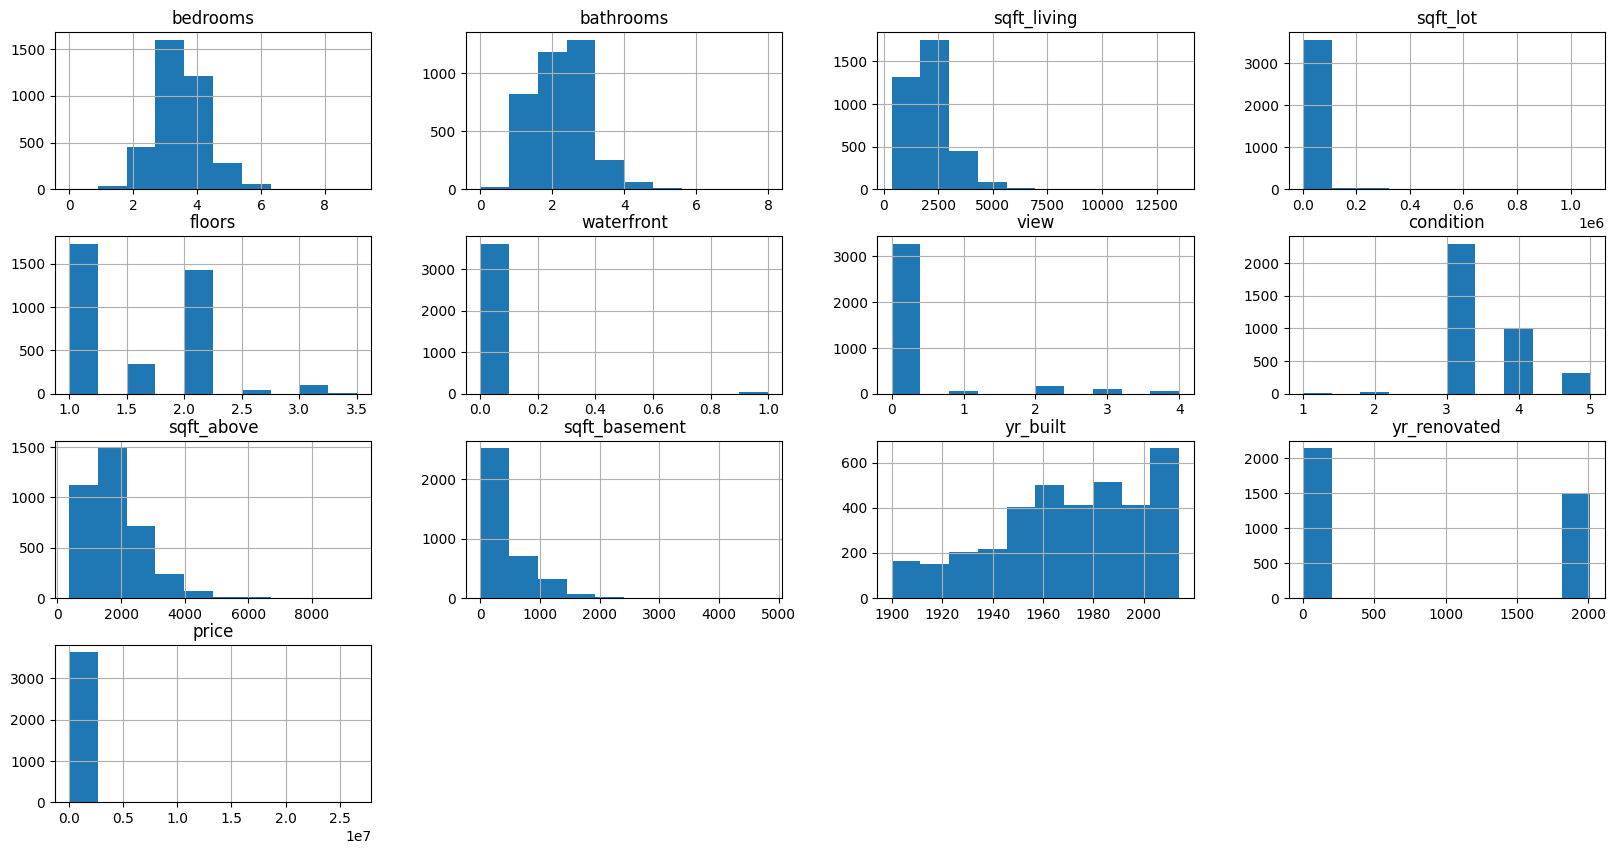

In [69]:
train_data.hist(figsize=(20, 10))

<Axes: >

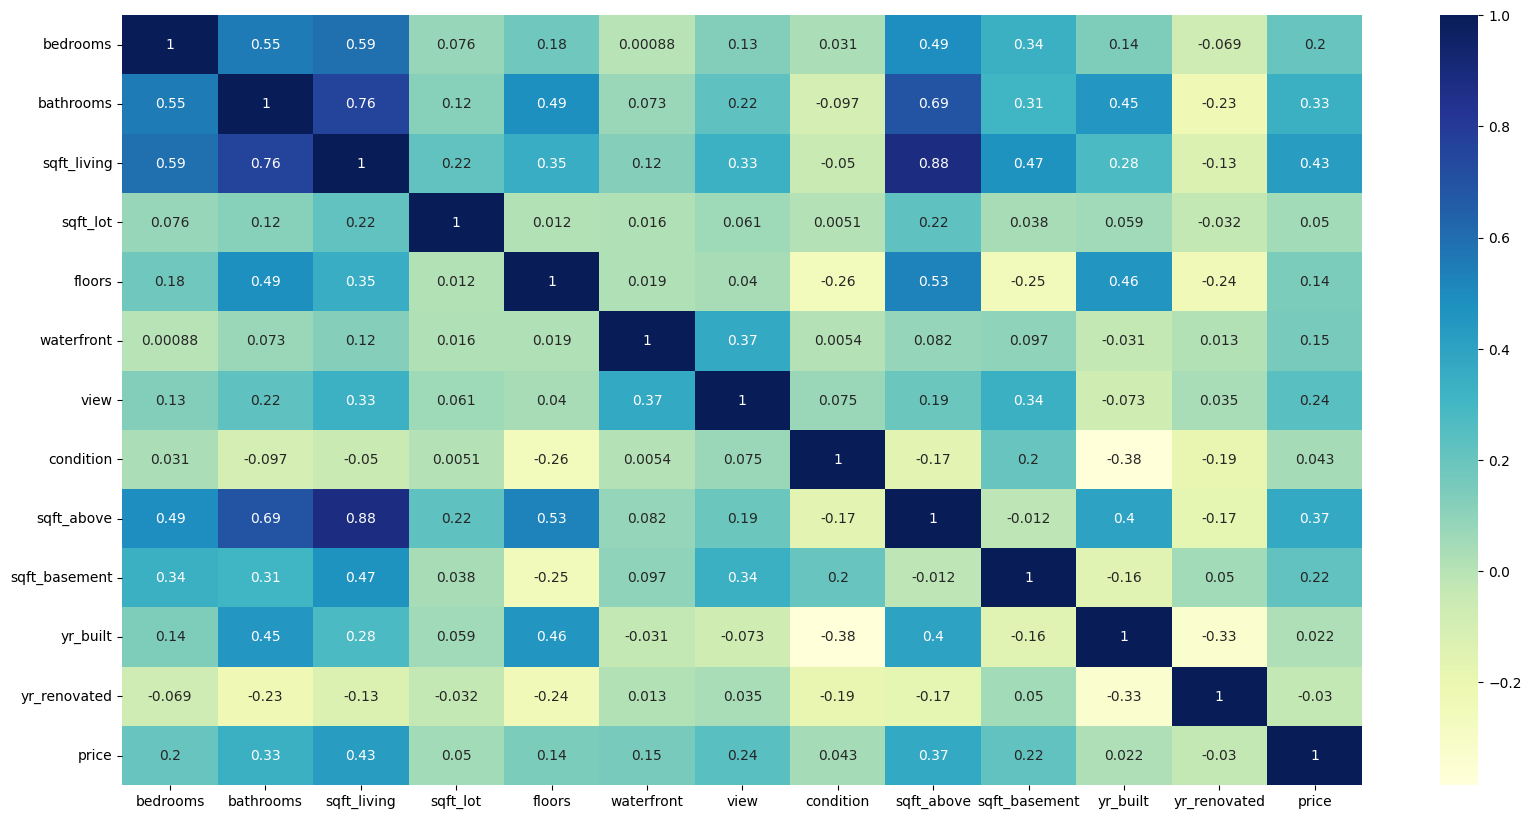

In [70]:
pyplot.figure(figsize=(20, 10))
numeric_train_data = train_data.select_dtypes(include=[np.number])
sns.heatmap(numeric_train_data.corr(), annot=True, cmap="YlGnBu")

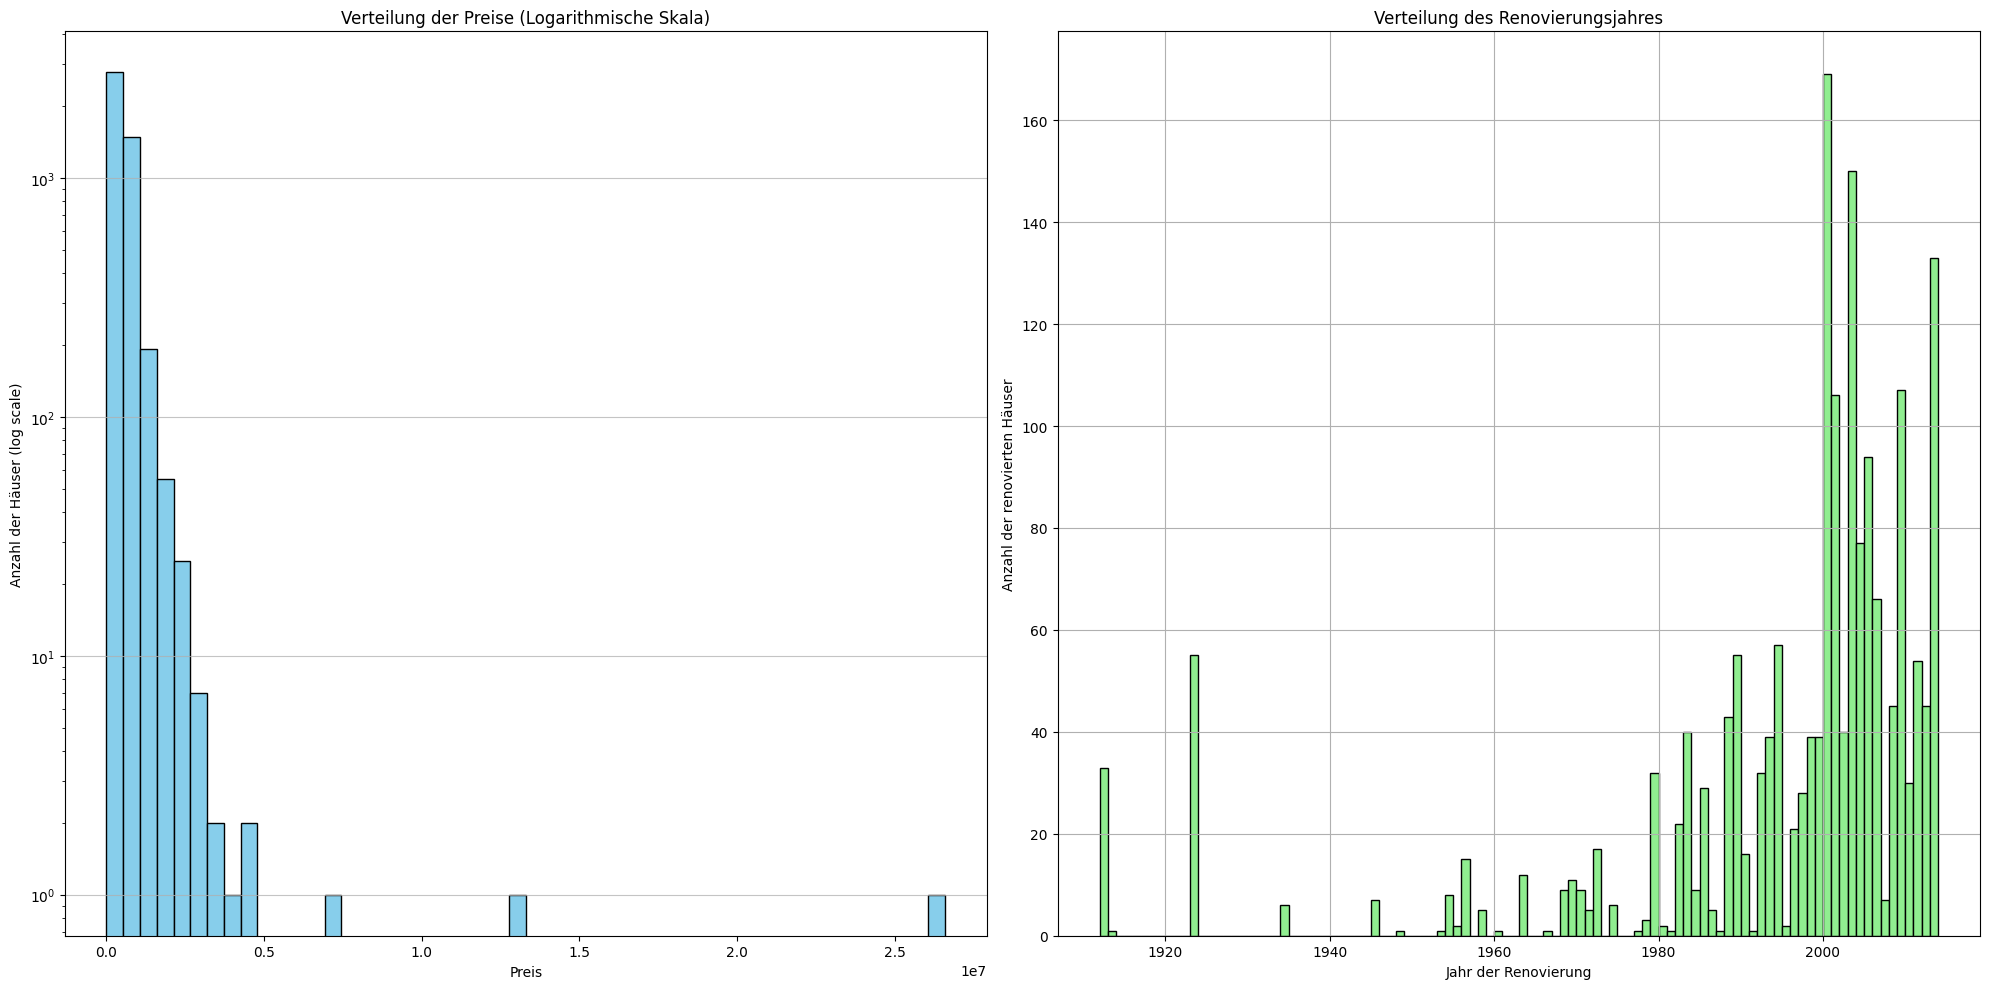

In [71]:
fig, ax = pyplot.subplots(1, 2, figsize=(20, 10))

renovated = data[data['yr_renovated'] > 0]
renovated['yr_renovated'].hist(ax=ax[1], bins=(renovated['yr_renovated'].max() - renovated['yr_renovated'].min()), color='lightgreen', edgecolor='black')
ax[1].set_title('Verteilung des Renovierungsjahres')
ax[1].set_xlabel('Jahr der Renovierung')
ax[1].set_ylabel('Anzahl der renovierten Häuser')

prices = data[data['price'] > 0]
ax[0].hist(prices['price'], bins=50, color='skyblue', edgecolor='black', log=True)
ax[0].set_title('Verteilung der Preise (Logarithmische Skala)')
ax[0].set_xlabel('Preis')
ax[0].set_ylabel('Anzahl der Häuser (log scale)')
ax[0].grid(axis='y', alpha=0.75)

pyplot.tight_layout()
pyplot.show()